In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
from numpy import loadtxt, corrcoef, delete, array, concatenate, vstack, ones
from numpy.linalg import lstsq
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

In [2]:
dataset = loadtxt('lab1.csv', skiprows=1, delimiter=',')
y = dataset[:, 0]
xs = dataset[:, 1:].transpose()

In [3]:
worst = abs(corrcoef(y, xs)[0][1:]).argmin()
xs = delete(xs, worst, axis=0)

In [4]:
sequences = concatenate([xs]+[xs[i]*xs[i:] for i in range(xs.shape[0])])

In [5]:
regression_coefficients = [lstsq(vstack([x, ones(x.size)]).T, y)[0] for x in sequences]

In [6]:
(y - [(a*x + b) for (a, b), x in zip(regression_coefficients, sequences)]).sum(axis=1)

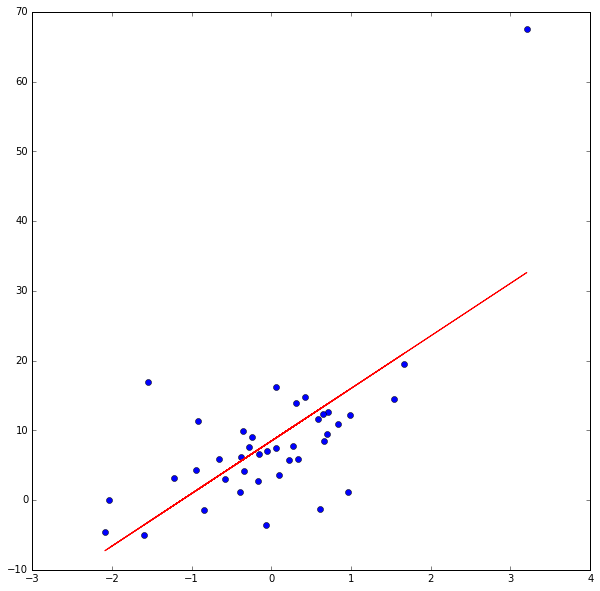

In [7]:
for (a, b), x in zip(regression_coefficients, sequences):
    plt.plot(x, y, 'o', label='Original data')
    plt.plot(x, a * x + b, 'r', label='Fitted line')
    break